In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab Notebooks/ALD
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/ALD'
/content/drive/MyDrive/Colab Notebooks/ALD
datasets/


In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
DATASET_PATH = 'datasets/Accelerometer Data + TAC/'
datasets = {filename.split('.')[0]: pd.read_csv(f'{DATASET_PATH}feature_data/{filename}') for filename in os.listdir(f'{DATASET_PATH}feature_data/')}

In [ ]:
total_len = 0
toxicated = 0
intoxicated = 0
for dataset in datasets.values():
    total_len += len(dataset)
    intoxicated += sum(dataset['ground_truth'])
toxicated = total_len - intoxicated

print(f'Total number of samples: {total_len}')
print(f'toxicated: {toxicated}')
print(f'intoxicated: {intoxicated}')

Total number of samples: 35860
toxicated: 16672
intoxicated: 19188


In [ ]:
datasets[list(datasets.keys())[0]].head()

,x_mean_mean,x_mean_variance,x_mean_min,x_mean_max,x_mean_lower_third_mean,x_mean_upper_third_mean,y_mean_mean,y_mean_variance,y_mean_min,y_mean_max,...,y_max_freq_max_diff,y_max_freq_lower_third_mean_diff,y_max_freq_upper_third_mean_diff,z_max_freq_mean_diff,z_max_freq_variance_diff,z_max_freq_min_diff,z_max_freq_max_diff,z_max_freq_lower_third_mean_diff,z_max_freq_upper_third_mean_diff,ground_truth
0,0.013721,7.599049e-04,-0.017745,0.070992,-0.009408,0.023633,0.000898,0.000027,-0.010774,0.009670,...,17.0,3.166667,9.857143,10.750000,45.562500,0.0,19.5,2.833333,14.142857,1
1,0.002651,2.973126e-05,-0.002529,0.014274,-0.002195,0.004728,0.005218,0.000027,-0.001043,0.015194,...,2.5,0.333333,3.071429,0.200000,-14.590000,3.0,0.0,1.500000,-0.357143,1
2,0.000887,9.807391e-06,-0.002924,0.007199,-0.002314,0.002259,0.003658,0.000008,-0.000531,0.009664,...,0.0,-0.666667,1.684211,-1.478947,14.995568,-3.0,-1.5,-3.666667,-0.541353,1
3,-0.000514,2.979465e-06,-0.004895,0.000923,-0.002582,0.000373,0.002559,0.000019,-0.002534,0.014478,...,-0.5,-2.491453,-5.147983,-1.744755,3.987999,0.0,1.5,0.683761,-2.785547,1
4,0.000993,2.941775e-07,-0.000308,0.002049,0.000487,0.001210,0.001876,0.000007,-0.001435,0.009453,...,0.5,1.491453,3.892343,-1.526298,-4.346067,0.0,-1.5,-1.183761,-1.673099,1


In [ ]:
X_data, y_data = [], []

for dataset in datasets.values():
    dataset = dataset.dropna()
    X_data.extend(dataset.iloc[:, :-1].values)
    y_data.extend(dataset.iloc[:, -1].values)

X_data = np.array(X_data)
y_data = np.array(y_data)

# Scaling Feature Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data)

# Model Training
Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (28362, 756)
X_test shape: (7091, 756)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8901424340713581


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# Gaussian Naive Bayes

---



In [ ]:
from sklearn.naive_bayes import GaussianNB

response_values  = []
for train_index, test_index in kf.split(X_data):
  x_test, x_train = X_data[test_index], X_data[train_index]
  y_test, y_train = y_data[test_index], y_data[train_index]
  clf = GaussianNB()
  clf.fit(x_train, y_train)
  acc = accuracy_score(y_test, clf.predict(x_test))
  response_values.append(acc)
  print('Accuracy GNBClassifier ',acc)
print('Avg Accuracy ',np.mean(response_values))

Accuracy GNBClassifier  0.0005640157924421884
Accuracy GNBClassifier  0.2098138747884941
Accuracy GNBClassifier  0.6604624929498026
Accuracy GNBClassifier  0.6741889985895627
Accuracy GNBClassifier  0.7447108603667136
Accuracy GNBClassifier  0.7808180535966149
Accuracy GNBClassifier  0.02538787023977433
Accuracy GNBClassifier  0.8736248236953456
Accuracy GNBClassifier  0.6104372355430183
Accuracy GNBClassifier  0.5320169252468265
Avg Accuracy  0.5112025150808595


# Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

response_values  = []
for train_index, test_index in kf.split(X_data):
  x_test, x_train = X_data[test_index], X_data[train_index]
  y_test, y_train = y_data[test_index], y_data[train_index]
  clf = SGDClassifier(loss="hinge", penalty="l2")
  clf.fit(x_train, y_train)
  acc = accuracy_score(y_test, clf.predict(x_test))
  response_values.append(acc)
  print('Accuracy SGDClassifier ',acc)
print('Avg Accuracy ',np.mean(response_values))

Accuracy SGDClassifier  0.733784545967287
Accuracy SGDClassifier  0.45346869712351945
Accuracy SGDClassifier  0.6049069373942471
Accuracy SGDClassifier  0.7187588152327221
Accuracy SGDClassifier  0.86262341325811
Accuracy SGDClassifier  0.7997179125528914
Accuracy SGDClassifier  0.8586741889985896
Accuracy SGDClassifier  0.5021156558533145
Accuracy SGDClassifier  0.5571227080394923
Accuracy SGDClassifier  0.9283497884344146
Avg Accuracy  0.7019522662854588


# COMPARISON

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

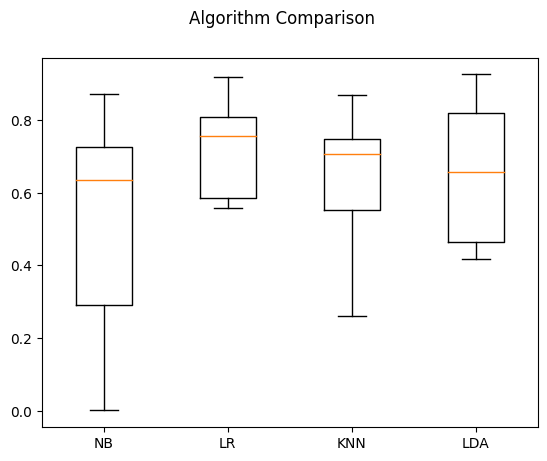

In [ ]:
# prepare configuration for cross validation test harness
# seed = 7
# prepare models
models = []
# models.append(('RFC', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('SVM', SVC()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10)
 cv_results = cross_val_score(model, X_data, y_data, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
for i in range(len(names)):
  print(names[i], cv_results[i])

NB 0.7670614777213762
LR 0.5462492949802594
KNN 0.43542019176536945
LDA 0.786459802538787
